In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import plotly.express as px
%matplotlib inline

## Step 1: Load Data

In [2]:
df = pd.read_csv(r'C:\Users\ramya\OneDrive\Desktop\Capstone\Disability_Insurance__DI__-_Monthly_Data.csv')

In [3]:
df.sample(5)

,Area Type,Area Name,Date,Month,Year,Initial Claims Filed,Initial Claims Paid,Average Weekly Benefit Amount (AWBA),Weeks Compensated,Average Duration,Total Benefits Authorized,DI Fund Balance
329,State,California,1/31/1995,January,1995,55480,48561,227.11,684914,12.87,155552889,1324114167
502,State,California,8/31/1980,August,1980,67174,54465,113.96,492013,8.59,56067514,477311291
213,State,California,9/30/2004,September,2004,62777,56090,350.29,835862,15.01,292792650,1686301752
43,State,California,11/30/2018,November,2018,58737,53582,605.98,896231,16.15,543099310,3238774325
151,State,California,11/30/2009,November,2009,52566,48176,447.30,809282,15.72,361992382,1178741815


In [4]:
df.dtypes

Area Type                                object
Area Name                                object
Date                                     object
Month                                    object
Year                                      int64
Initial Claims Filed                      int64
Initial Claims Paid                       int64
Average Weekly Benefit Amount (AWBA)    float64
Weeks Compensated                         int64
Average Duration                        float64
Total Benefits Authorized                 int64
DI Fund Balance                           int64
dtype: object

In [5]:
df.shape

(582, 12)

In [6]:
df.head()

,Area Type,Area Name,Date,Month,Year,Initial Claims Filed,Initial Claims Paid,Average Weekly Benefit Amount (AWBA),Weeks Compensated,Average Duration,Total Benefits Authorized,DI Fund Balance
0,State,California,6/30/2022,June,2022,73779,59676,745.50,917822,15.24,684234488,3920209365
1,State,California,5/31/2022,May,2022,70308,55712,740.31,899451,15.31,665875696,3765194409
2,State,California,4/30/2022,April,2022,96154,55877,737.30,892644,15.26,658147905,3688904401
3,State,California,3/31/2022,March,2022,70020,53449,737.51,877497,15.22,647159269,3661149399
4,State,California,2/28/2022,February,2022,61827,45086,741.07,743304,15.26,550839231,3438104182


In [7]:
df.tail()

,Area Type,Area Name,Date,Month,Year,Initial Claims Filed,Initial Claims Paid,Average Weekly Benefit Amount (AWBA),Weeks Compensated,Average Duration,Total Benefits Authorized,DI Fund Balance
577,State,California,5/31/1974,May,1974,65332,53564,80.51,393635,NaN,31689587,149299228
578,State,California,4/30/1974,April,1974,66520,51215,79.06,392586,NaN,31036284,109879903
579,State,California,3/31/1974,March,1974,64979,52432,78.43,364966,NaN,28625922,150460863
580,State,California,2/28/1974,February,1974,59059,45787,78.52,325737,NaN,25575974,144796150
581,State,California,1/31/1974,January,1974,64071,48040,78.48,377071,NaN,29592271,112058512


## Step 2: Cleaning Data

In [8]:
df.isnull().sum()

Area Type                                0
Area Name                                0
Date                                     0
Month                                    0
Year                                     0
Initial Claims Filed                     0
Initial Claims Paid                      0
Average Weekly Benefit Amount (AWBA)     0
Weeks Compensated                        0
Average Duration                        12
Total Benefits Authorized                0
DI Fund Balance                          0
dtype: int64

In [9]:
df.describe()

,Year,Initial Claims Filed,Initial Claims Paid,Average Weekly Benefit Amount (AWBA),Weeks Compensated,Average Duration,Total Benefits Authorized,DI Fund Balance
count,582.000000,582.000000,582.000000,582.000000,5.820000e+02,570.000000,5.820000e+02,5.820000e+02
mean,1997.752577,63128.671821,54352.728522,300.807509,7.205530e+05,13.176772,2.393394e+08,1.254457e+09
std,14.014277,8502.327169,6269.469968,176.502590,1.862445e+05,2.726427,1.718634e+08,1.094446e+09
min,1974.000000,24492.000000,27804.000000,78.430000,3.167860e+05,7.350000,2.557597e+07,-5.828048e+07
25%,1986.000000,58072.750000,50259.250000,161.202500,5.986815e+05,12.315000,1.049133e+08,2.911249e+08
50%,1998.000000,62186.000000,53986.500000,229.255000,7.629285e+05,13.640000,1.846501e+08,8.030886e+08
75%,2010.000000,66619.500000,57457.000000,445.657500,8.553465e+05,15.475000,3.679486e+08,2.182815e+09
max,2022.000000,147335.000000,77761.000000,793.420000,1.147771e+06,17.320000,8.272397e+08,3.920209e+09


In [10]:
#Finding the mean of the column having NaN
mean_value=df['Average Duration'].mean()
mean_value

13.176771929824568

In [11]:
# Replace NaNs in column 'Average Duration' with the
# mean of values in the same column
df['Average Duration'].fillna(value=mean_value, inplace=True)

In [12]:
df.isnull().sum()

Area Type                               0
Area Name                               0
Date                                    0
Month                                   0
Year                                    0
Initial Claims Filed                    0
Initial Claims Paid                     0
Average Weekly Benefit Amount (AWBA)    0
Weeks Compensated                       0
Average Duration                        0
Total Benefits Authorized               0
DI Fund Balance                         0
dtype: int64

In [13]:
df.nunique()

Area Type                                 1
Area Name                                 1
Date                                    582
Month                                    12
Year                                     49
Initial Claims Filed                    573
Initial Claims Paid                     574
Average Weekly Benefit Amount (AWBA)    578
Weeks Compensated                       582
Average Duration                        355
Total Benefits Authorized               582
DI Fund Balance                         582
dtype: int64

In [14]:
df.dtypes

Area Type                                object
Area Name                                object
Date                                     object
Month                                    object
Year                                      int64
Initial Claims Filed                      int64
Initial Claims Paid                       int64
Average Weekly Benefit Amount (AWBA)    float64
Weeks Compensated                         int64
Average Duration                        float64
Total Benefits Authorized                 int64
DI Fund Balance                           int64
dtype: object

In [15]:
df['Date'] = pd.to_datetime(df['Date'])

In [16]:
df.dtypes

Area Type                                       object
Area Name                                       object
Date                                    datetime64[ns]
Month                                           object
Year                                             int64
Initial Claims Filed                             int64
Initial Claims Paid                              int64
Average Weekly Benefit Amount (AWBA)           float64
Weeks Compensated                                int64
Average Duration                               float64
Total Benefits Authorized                        int64
DI Fund Balance                                  int64
dtype: object

In [17]:
df["Year"].value_counts()

1998    12
1997    12
1995    12
1994    12
1993    12
1992    12
1991    12
1990    12
1989    12
1988    12
1987    12
1986    12
1985    12
1984    12
1983    12
1982    12
1981    12
1980    12
1979    12
1978    12
1977    12
1976    12
1975    12
1996    12
1974    12
2021    12
1999    12
2020    12
2019    12
2018    12
2017    12
2016    12
2015    12
2014    12
2013    12
2012    12
2011    12
2010    12
2009    12
2008    12
2007    12
2006    12
2005    12
2004    12
2003    12
2002    12
2001    12
2000    12
2022     6
Name: Year, dtype: int64

In [18]:
df['Month'].unique()

array(['June', 'May', 'April', 'March', 'February', 'January', 'December',
       'November', 'October', 'September', 'August', 'July'], dtype=object)

In [19]:
df.head()

,Area Type,Area Name,Date,Month,Year,Initial Claims Filed,Initial Claims Paid,Average Weekly Benefit Amount (AWBA),Weeks Compensated,Average Duration,Total Benefits Authorized,DI Fund Balance
0,State,California,2022-06-30,June,2022,73779,59676,745.50,917822,15.24,684234488,3920209365
1,State,California,2022-05-31,May,2022,70308,55712,740.31,899451,15.31,665875696,3765194409
2,State,California,2022-04-30,April,2022,96154,55877,737.30,892644,15.26,658147905,3688904401
3,State,California,2022-03-31,March,2022,70020,53449,737.51,877497,15.22,647159269,3661149399
4,State,California,2022-02-28,February,2022,61827,45086,741.07,743304,15.26,550839231,3438104182


In [20]:
# Applying the condition
df.loc[df["Month"] == "January", "MonthNo"] = 1
df.loc[df["Month"] == "February", "MonthNo"] = 2
df.loc[df["Month"] == "March", "MonthNo"] = 3
df.loc[df["Month"] == "April", "MonthNo"] = 4
df.loc[df["Month"] == "May", "MonthNo"] = 5
df.loc[df["Month"] == "June", "MonthNo"] = 6
df.loc[df["Month"] == "July", "MonthNo"] = 7
df.loc[df["Month"] == "August", "MonthNo"] = 8
df.loc[df["Month"] == "September", "MonthNo"] = 9
df.loc[df["Month"] == "October", "MonthNo"] = 10
df.loc[df["Month"] == "November", "MonthNo"] = 11
df.loc[df["Month"] == "December", "MonthNo"] = 12

In [21]:
df.head()

,Area Type,Area Name,Date,Month,Year,Initial Claims Filed,Initial Claims Paid,Average Weekly Benefit Amount (AWBA),Weeks Compensated,Average Duration,Total Benefits Authorized,DI Fund Balance,MonthNo
0,State,California,2022-06-30,June,2022,73779,59676,745.50,917822,15.24,684234488,3920209365,6.0
1,State,California,2022-05-31,May,2022,70308,55712,740.31,899451,15.31,665875696,3765194409,5.0
2,State,California,2022-04-30,April,2022,96154,55877,737.30,892644,15.26,658147905,3688904401,4.0
3,State,California,2022-03-31,March,2022,70020,53449,737.51,877497,15.22,647159269,3661149399,3.0
4,State,California,2022-02-28,February,2022,61827,45086,741.07,743304,15.26,550839231,3438104182,2.0


In [22]:
df.dtypes

Area Type                                       object
Area Name                                       object
Date                                    datetime64[ns]
Month                                           object
Year                                             int64
Initial Claims Filed                             int64
Initial Claims Paid                              int64
Average Weekly Benefit Amount (AWBA)           float64
Weeks Compensated                                int64
Average Duration                               float64
Total Benefits Authorized                        int64
DI Fund Balance                                  int64
MonthNo                                        float64
dtype: object

In [23]:
df[df['Initial Claims Filed']>90000]

,Area Type,Area Name,Date,Month,Year,Initial Claims Filed,Initial Claims Paid,Average Weekly Benefit Amount (AWBA),Weeks Compensated,Average Duration,Total Benefits Authorized,DI Fund Balance,MonthNo
2,State,California,2022-04-30,April,2022,96154,55877,737.30,892644,15.26,658147905,3688904401,4.0
6,State,California,2021-12-31,December,2021,147335,75793,793.42,1042619,15.43,827239691,3004135661,12.0
7,State,California,2021-11-30,November,2021,114481,76933,767.53,1030544,15.66,790976842,3208231124,11.0
368,State,California,1991-10-31,October,1991,90586,77761,208.31,1147771,14.26,239089013,394746995,10.0


In [24]:
df[((df['Year']==2022) & (df['MonthNo'] == 4)) | ((df['Year']==1991) &(df['MonthNo'] == 10))]

,Area Type,Area Name,Date,Month,Year,Initial Claims Filed,Initial Claims Paid,Average Weekly Benefit Amount (AWBA),Weeks Compensated,Average Duration,Total Benefits Authorized,DI Fund Balance,MonthNo
2,State,California,2022-04-30,April,2022,96154,55877,737.30,892644,15.26,658147905,3688904401,4.0
368,State,California,1991-10-31,October,1991,90586,77761,208.31,1147771,14.26,239089013,394746995,10.0


In [25]:
df[(df['Year']==2021) & ((df['MonthNo'] == 11) | (df['MonthNo'] == 12)) ]

,Area Type,Area Name,Date,Month,Year,Initial Claims Filed,Initial Claims Paid,Average Weekly Benefit Amount (AWBA),Weeks Compensated,Average Duration,Total Benefits Authorized,DI Fund Balance,MonthNo
6,State,California,2021-12-31,December,2021,147335,75793,793.42,1042619,15.43,827239691,3004135661,12.0
7,State,California,2021-11-30,November,2021,114481,76933,767.53,1030544,15.66,790976842,3208231124,11.0


In [26]:
# delete all rows with Year 2021 and Month 11 & 12 
indexAge = df[(df['Year']==2021) & ((df['MonthNo'] == 11) | (df['MonthNo'] == 12)) ].index
df.drop(indexAge , inplace=True)
indexAge = df[((df['Year']==2022) & (df['MonthNo'] == 4)) | ((df['Year']==1991) &(df['MonthNo'] == 10)) ].index
df.drop(indexAge , inplace=True)
df.head(15)

,Area Type,Area Name,Date,Month,Year,Initial Claims Filed,Initial Claims Paid,Average Weekly Benefit Amount (AWBA),Weeks Compensated,Average Duration,Total Benefits Authorized,DI Fund Balance,MonthNo
0,State,California,2022-06-30,June,2022,73779,59676,745.50,917822,15.24,684234488,3920209365,6.0
1,State,California,2022-05-31,May,2022,70308,55712,740.31,899451,15.31,665875696,3765194409,5.0
3,State,California,2022-03-31,March,2022,70020,53449,737.51,877497,15.22,647159269,3661149399,3.0
4,State,California,2022-02-28,February,2022,61827,45086,741.07,743304,15.26,550839231,3438104182,2.0
5,State,California,2022-01-30,January,2022,75826,49395,748.13,761395,15.27,569624374,3093255031,1.0
8,State,California,2021-10-31,October,2021,68284,59440,715.89,869527,16.03,622489014,3323065211,10.0
9,State,California,2021-09-30,September,2021,63707,56064,718.92,888959,16.18,639094660,3291780619,9.0
10,State,California,2021-08-31,August,2021,62630,55908,715.76,894770,16.26,640443876,3333546919,8.0
11,State,California,2021-07-31,July,2021,61938,56237,714.24,877136,16.36,626483766,3256601427,7.0
12,State,California,2021-06-30,June,2021,61519,55302,711.50,911775,16.50,648729568,3154127488,6.0


In [27]:
df[df['Initial Claims Filed']>90000]

,Area Type,Area Name,Date,Month,Year,Initial Claims Filed,Initial Claims Paid,Average Weekly Benefit Amount (AWBA),Weeks Compensated,Average Duration,Total Benefits Authorized,DI Fund Balance,MonthNo


In [28]:
df[(df['Year']==2021) & ((df['MonthNo'] == 11) | (df['MonthNo'] == 12)) ]

,Area Type,Area Name,Date,Month,Year,Initial Claims Filed,Initial Claims Paid,Average Weekly Benefit Amount (AWBA),Weeks Compensated,Average Duration,Total Benefits Authorized,DI Fund Balance,MonthNo


## Step 3: Relationship Analysis

In [29]:
corelation = df.corr()

In [30]:
corelation

,Year,Initial Claims Filed,Initial Claims Paid,Average Weekly Benefit Amount (AWBA),Weeks Compensated,Average Duration,Total Benefits Authorized,DI Fund Balance,MonthNo
Year,1.000000,-0.318540,0.113893,0.965669,0.764089,0.888175,0.951428,0.855526,-0.021165
Initial Claims Filed,-0.318540,1.000000,0.834704,-0.303939,0.228334,-0.123383,-0.201460,-0.331488,-0.033742
Initial Claims Paid,0.113893,0.834704,1.000000,0.062702,0.619926,0.295939,0.168464,0.015770,0.010462
Average Weekly Benefit Amount (AWBA),0.965669,-0.303939,0.062702,1.000000,0.690300,0.828291,0.988327,0.884810,-0.011913
Weeks Compensated,0.764089,0.228334,0.619926,0.690300,1.000000,0.871897,0.757845,0.535930,0.058292
Average Duration,0.888175,-0.123383,0.295939,0.828291,0.871897,1.000000,0.846186,0.683507,0.006241
Total Benefits Authorized,0.951428,-0.201460,0.168464,0.988327,0.757845,0.846186,1.000000,0.861196,0.008086
DI Fund Balance,0.855526,-0.331488,0.015770,0.884810,0.535930,0.683507,0.861196,1.000000,-0.011416
MonthNo,-0.021165,-0.033742,0.010462,-0.011913,0.058292,0.006241,0.008086,-0.011416,1.000000


<AxesSubplot:>

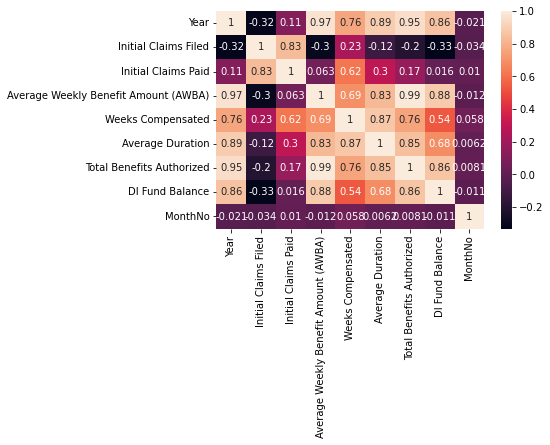

In [31]:
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True)

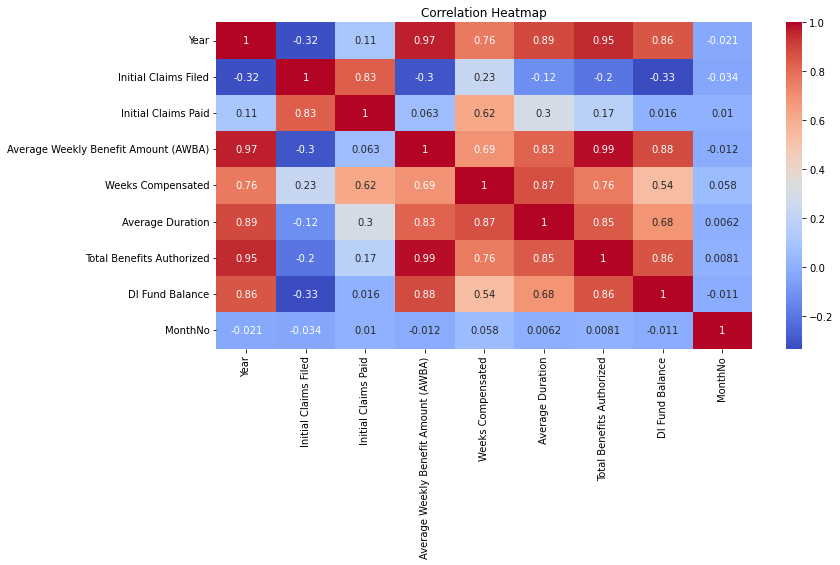

In [32]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

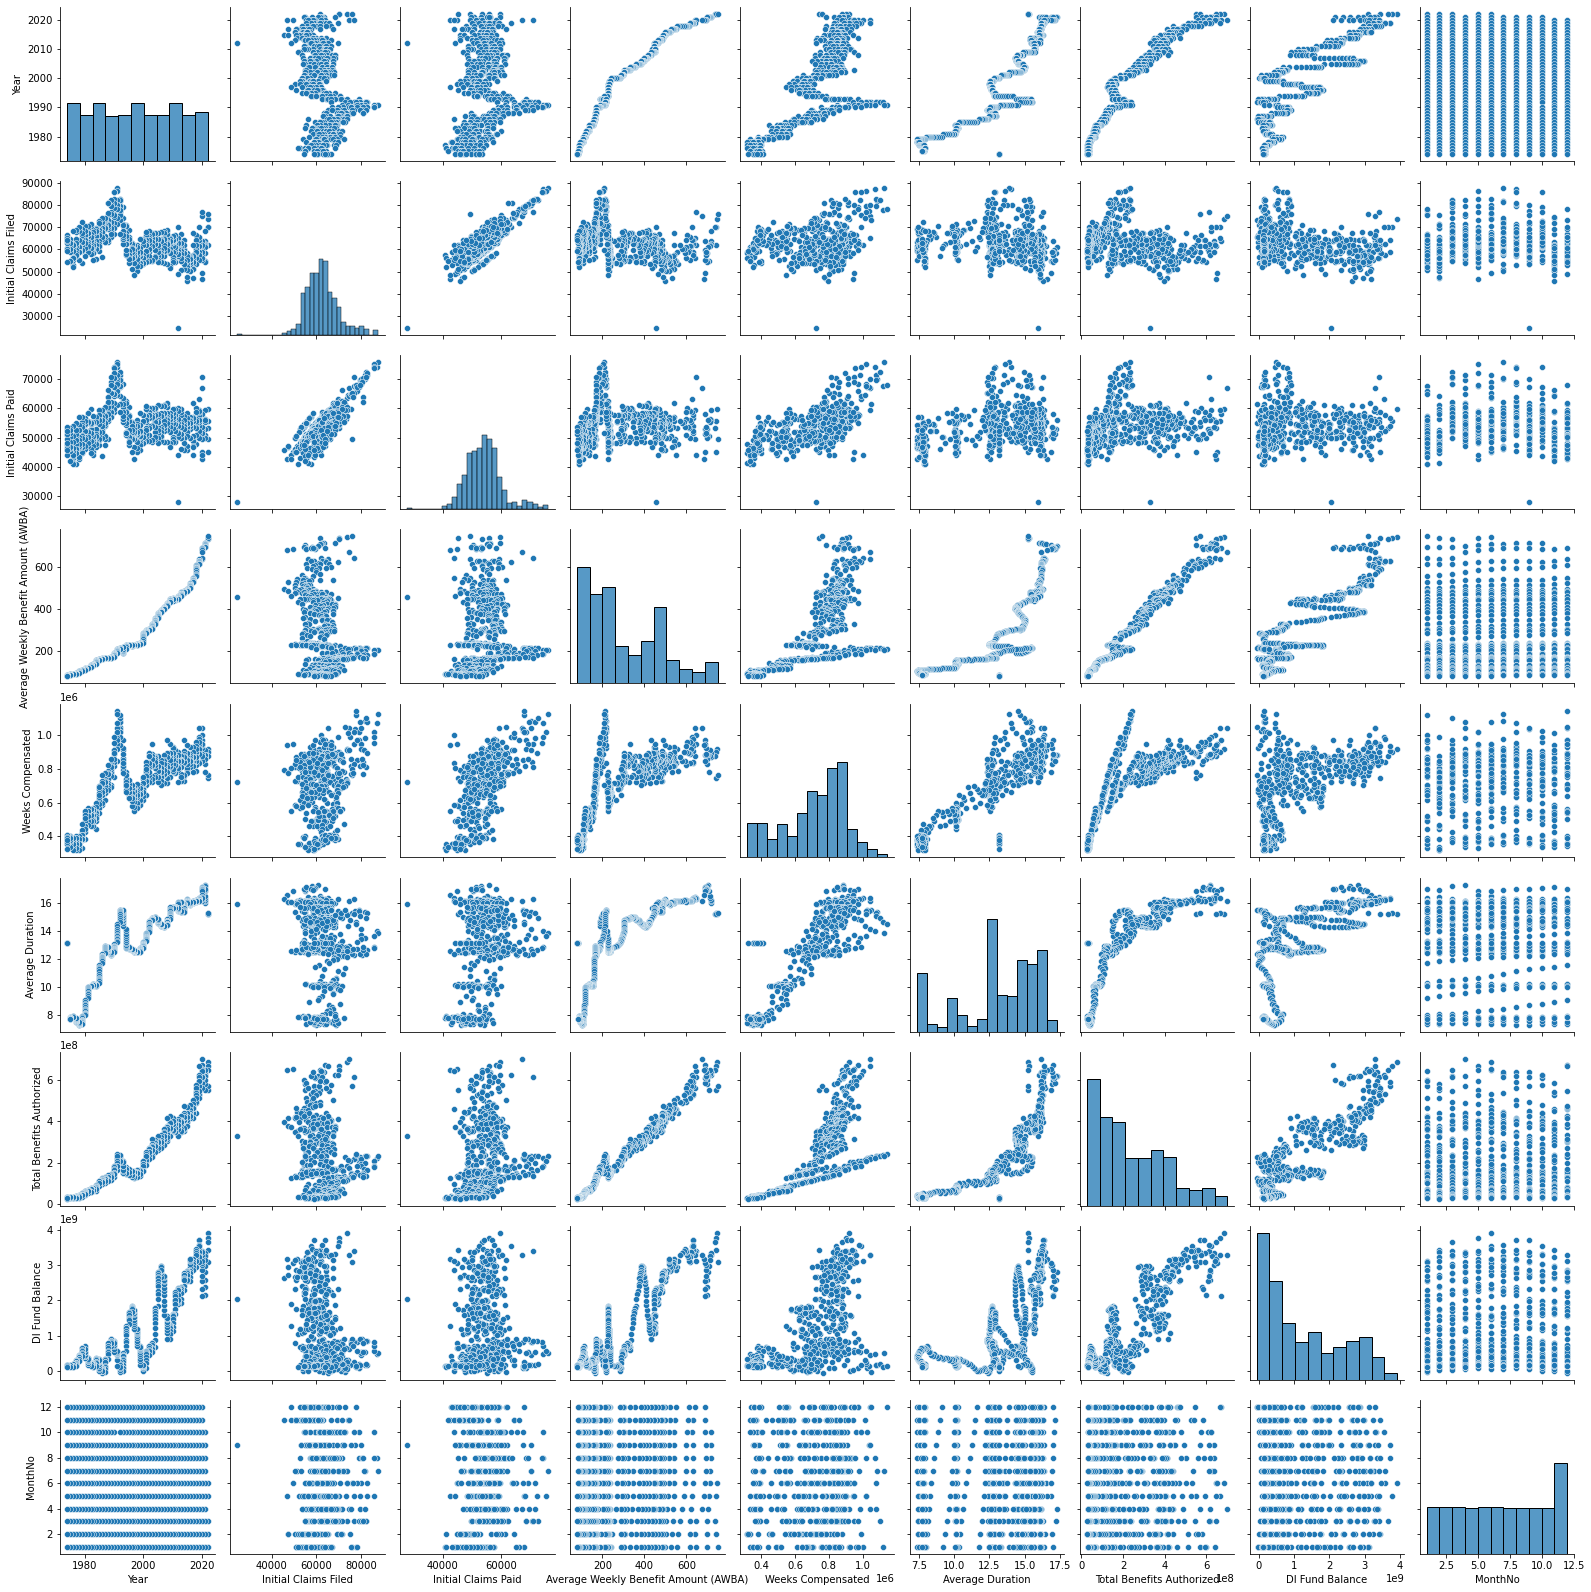

In [33]:
sns.pairplot(df)

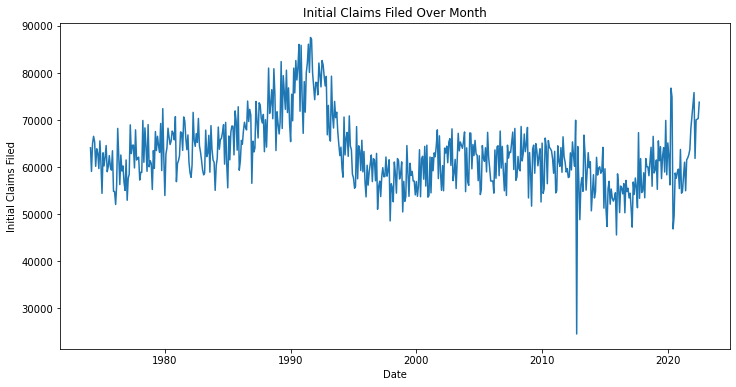

In [92]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Initial Claims Filed', data=df)
plt.title('Initial Claims Filed Over Month')
plt.show()

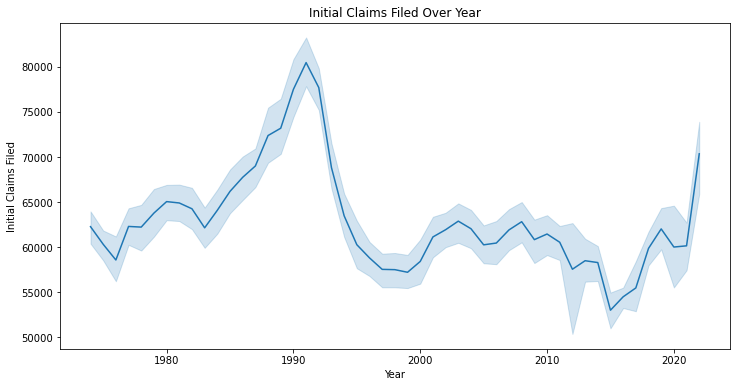

In [93]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Initial Claims Filed', data=df)
plt.title('Initial Claims Filed Over Year')
plt.show()

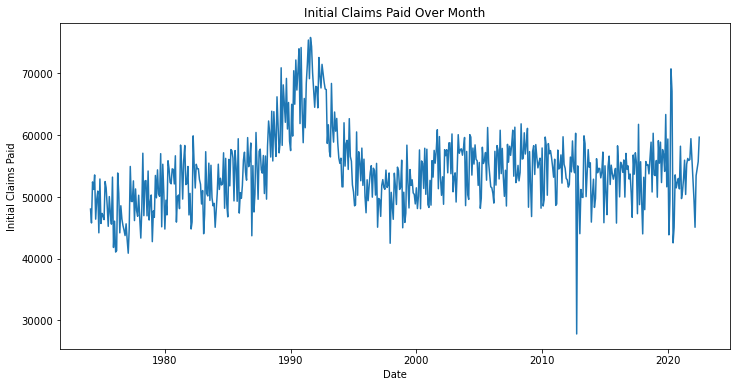

In [94]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Initial Claims Paid', data=df)
plt.title('Initial Claims Paid Over Month')
plt.show()

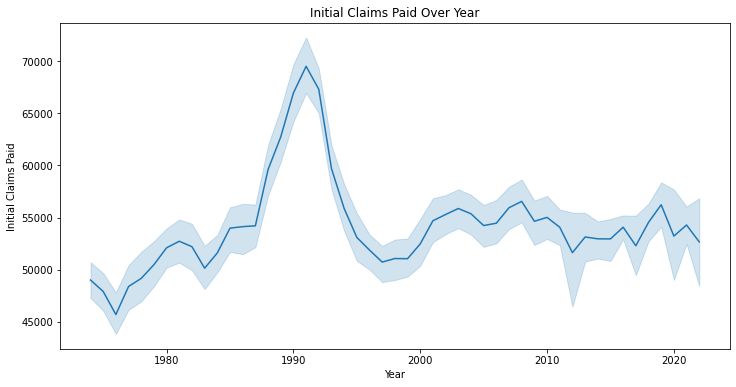

In [95]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Initial Claims Paid', data=df)
plt.title('Initial Claims Paid Over Year')
plt.show()

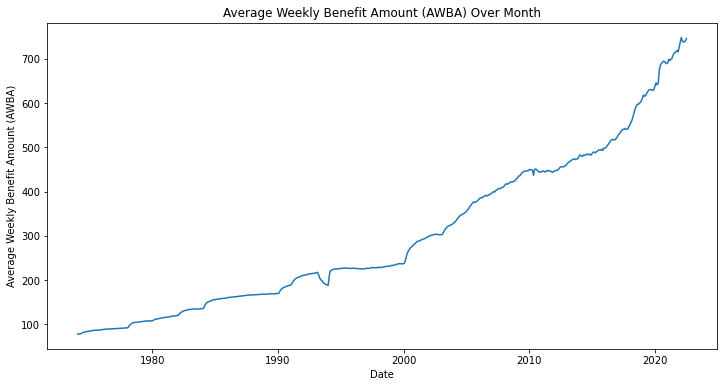

In [96]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Average Weekly Benefit Amount (AWBA)', data=df)
plt.title('Average Weekly Benefit Amount (AWBA) Over Month')
plt.show()

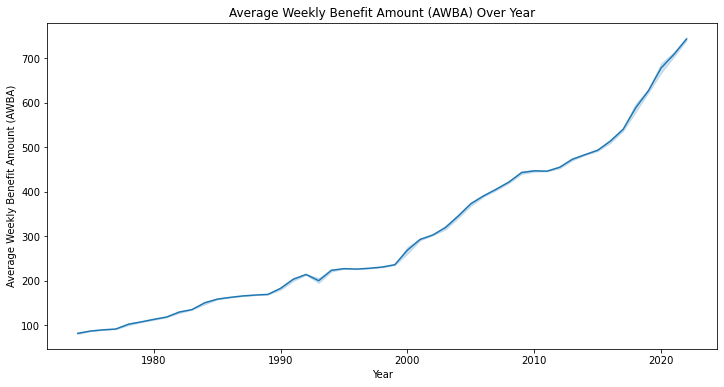

In [97]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Average Weekly Benefit Amount (AWBA)', data=df)
plt.title('Average Weekly Benefit Amount (AWBA) Over Year')
plt.show()

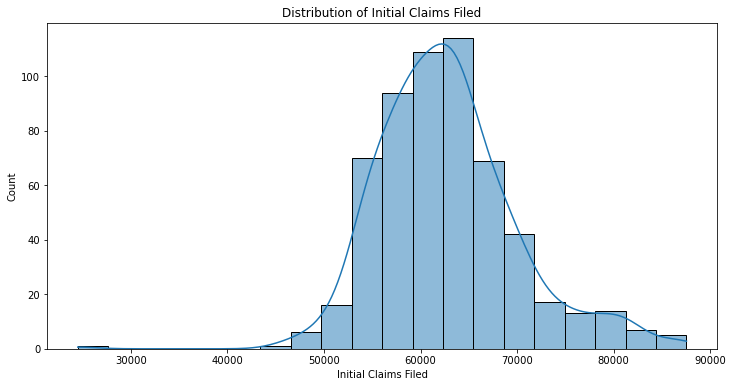

In [40]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Initial Claims Filed'], bins=20, kde=True)
plt.title('Distribution of Initial Claims Filed')
plt.show()

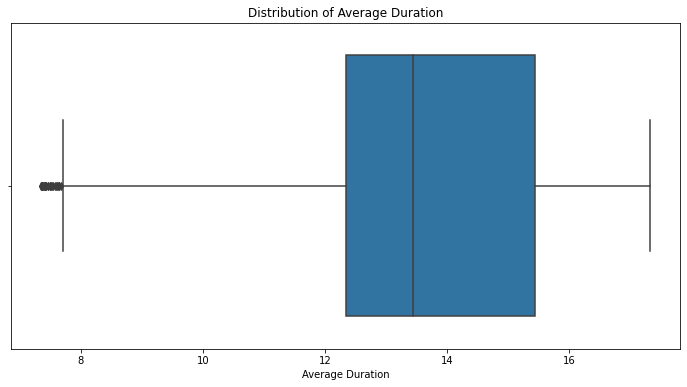

In [41]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Average Duration', data=df)
plt.title('Distribution of Average Duration')
plt.show()

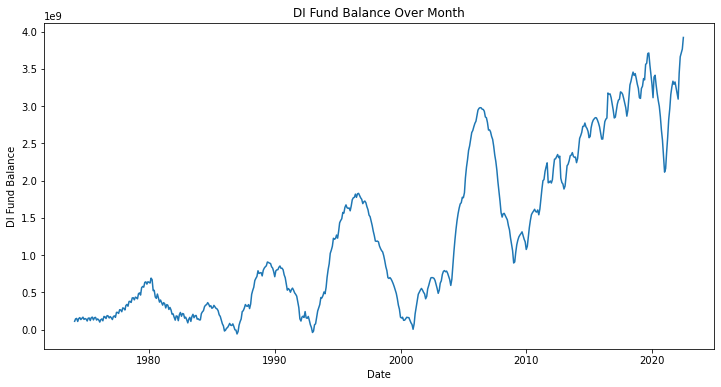

In [98]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='DI Fund Balance', data=df)
plt.title('DI Fund Balance Over Month')
plt.show()

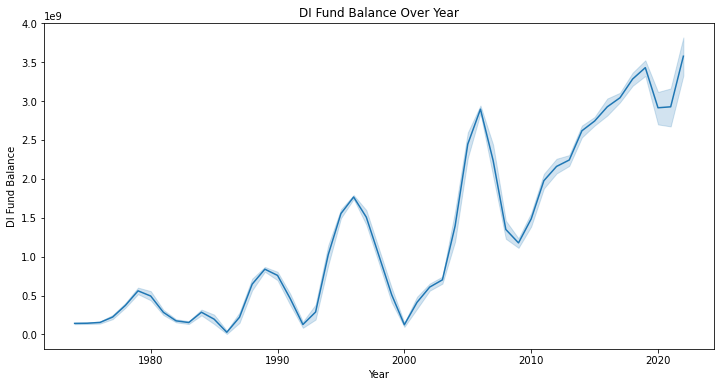

In [99]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='DI Fund Balance', data=df)
plt.title('DI Fund Balance Over Year')
plt.show()

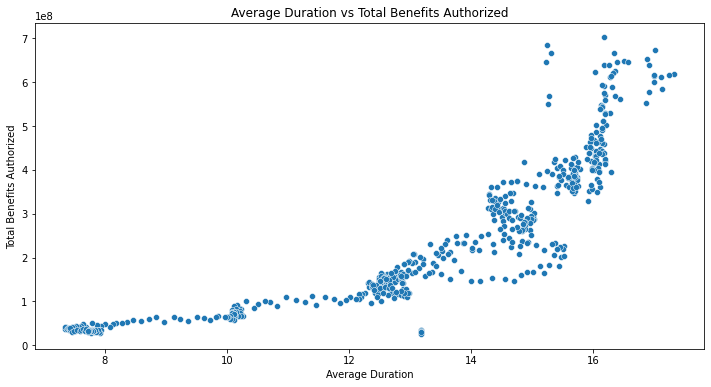

In [44]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Average Duration', y='Total Benefits Authorized', data=df)
plt.title('Average Duration vs Total Benefits Authorized')
plt.show()

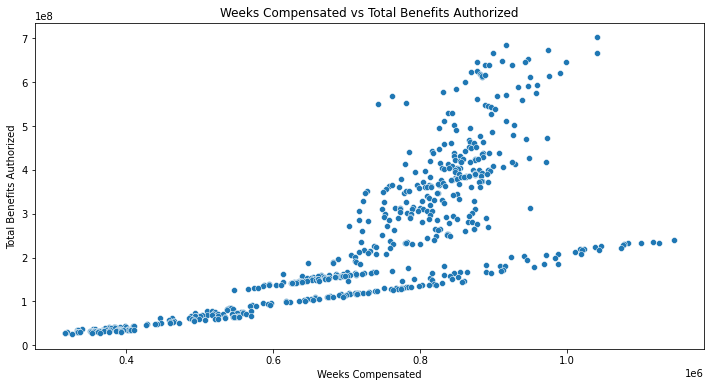

In [45]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Weeks Compensated', y='Total Benefits Authorized', data=df)
plt.title('Weeks Compensated vs Total Benefits Authorized')
plt.show()

In [46]:
df['Paid Claims Percentage'] = (df['Initial Claims Paid'] / df['Initial Claims Filed']) * 100

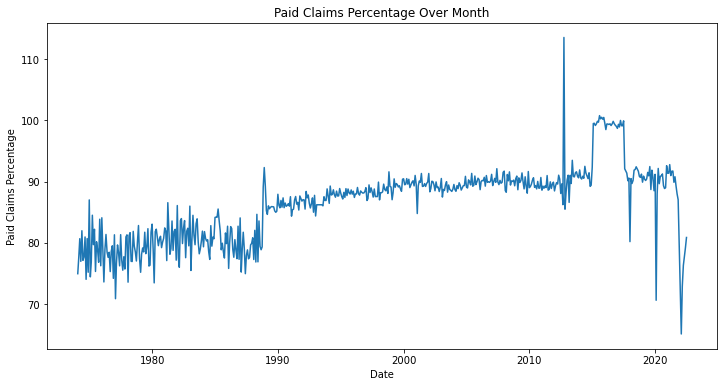

In [100]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Paid Claims Percentage', data=df)
plt.title('Paid Claims Percentage Over Month')
plt.show()

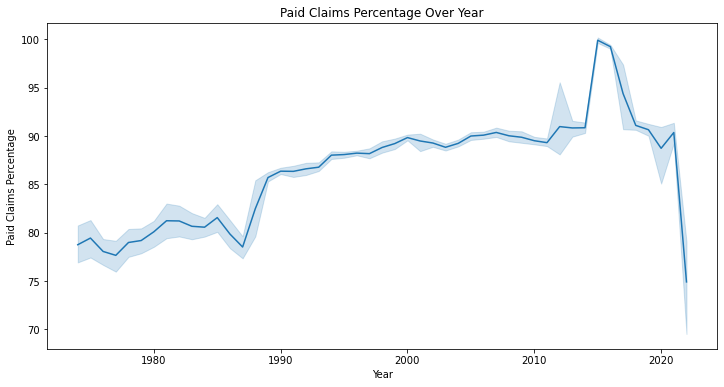

In [101]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Paid Claims Percentage', data=df)
plt.title('Paid Claims Percentage Over Year')
plt.show()

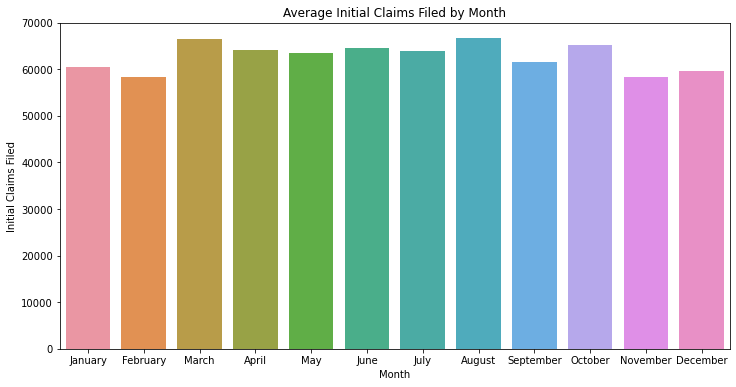

In [49]:
import numpy as np
plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Initial Claims Filed', data=df, estimator=np.mean, ci=None, order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Average Initial Claims Filed by Month')
plt.show()

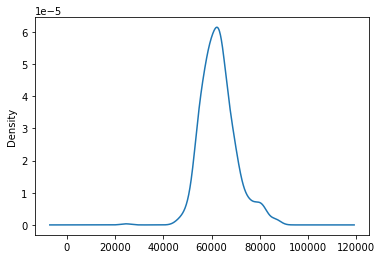

In [50]:
df['Initial Claims Filed'].plot(kind='kde')
plt.show()

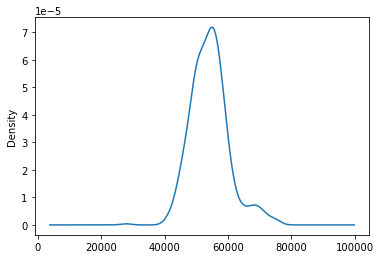

In [51]:
df['Initial Claims Paid'].plot(kind='kde')
plt.show()

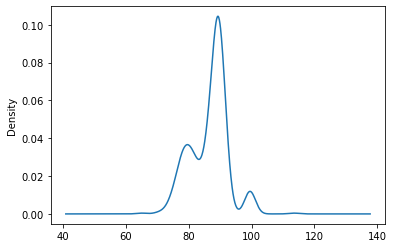

In [52]:
df['Paid Claims Percentage'].plot(kind='kde')
plt.show()

In [53]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train the model to predict Initial Claims to be Filed

In [54]:
from sklearn.tree import DecisionTreeRegressor
#from sklearn import datasets
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR


# instantiate the models
linear_reg = LinearRegression()
tree_reg = DecisionTreeRegressor(random_state=42)
forest_reg = RandomForestRegressor(random_state=42)
grad_boost_reg = GradientBoostingRegressor(random_state=42)
svm_reg = SVR()

In [55]:
X = df[['Year','MonthNo', 'Average Weekly Benefit Amount (AWBA)']]
##X = df[['Year','MonthNo']]
y = df['Initial Claims Filed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [56]:
models = {'Linear Regression': linear_reg}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name}: Mean Squared Error: {mse:.2f}, R-squared: {r2:.2f}')

Linear Regression: Mean Squared Error: 44039315.62, R-squared: 0.12


In [57]:
models = {'Decision Tree Regression': tree_reg}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name}: Mean Squared Error: {mse:.2f}, R-squared: {r2:.2f}')

Decision Tree Regression: Mean Squared Error: 30235108.82, R-squared: 0.39


In [58]:
models = {'Random Forest Regression': forest_reg}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name}: Mean Squared Error: {mse:.2f}, R-squared: {r2:.2f}')

Random Forest Regression: Mean Squared Error: 18177708.87, R-squared: 0.64


In [59]:
models = {'Gradient Boosting Regression': grad_boost_reg}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name}: Mean Squared Error: {mse:.2f}, R-squared: {r2:.2f}')

Gradient Boosting Regression: Mean Squared Error: 13657644.43, R-squared: 0.73


In [60]:
models = {'Support Vector Regression': svm_reg}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name}: Mean Squared Error: {mse:.2f}, R-squared: {r2:.2f}')

Support Vector Regression: Mean Squared Error: 50074480.22, R-squared: -0.00


## Choosing Gradient Boosting Regression

In [61]:
# creating the Numpy array
array = np.array([[2023, 1, 750], [2023, 2, 750], [2023, 3, 750], [2023, 4, 750], [2023, 5, 750]
                 , [2023, 6, 750], [2023, 7, 750], [2023, 8, 750], [2023, 9, 750], [2023, 10, 750]])

#array = np.array([[2023, 1], [2023, 2], [2023, 3], [2023, 4], [2023, 5]
#                 , [2023, 6], [2023, 7], [2023, 8], [2023, 9], [2023, 10]])
  
# creating a list of index names
index_values = [1,2,3,4,5,6,7,8,9,10]
   
# creating a list of column names
column_values = ['Year','MonthNo','Average Weekly Benefit Amount (AWBA)']
  
# creating the dataframe
X_2023_Prediction = pd.DataFrame(data = array, 
                  index = index_values, 
                  columns = column_values)

grad_boost_reg.fit(X_train, y_train)
y_pred = grad_boost_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f' Mean Squared Error: {mse:.2f}, R-squared: {r2:.2f}')
    


 Mean Squared Error: 13657644.43, R-squared: 0.73


In [62]:
##X_2023_scaled = scaler.transform(X_2023)
y_pred_2023 = grad_boost_reg.predict(X_2023_Prediction)
print(y_pred_2023)

[75023.62029619 70972.43862751 66966.24578481 68309.91150614
 68421.75416267 68126.05327478 67982.5139384  68688.04500678
 65688.22877295 68495.77170422]


In [63]:
X_2023_Prediction['Initial Claims Filed'] = np.int64(y_pred_2023)

### Predicted Initial Claims

In [64]:
X_2023_Prediction

,Year,MonthNo,Average Weekly Benefit Amount (AWBA),Initial Claims Filed
1,2023,1,750,75023
2,2023,2,750,70972
3,2023,3,750,66966
4,2023,4,750,68309
5,2023,5,750,68421
6,2023,6,750,68126
7,2023,7,750,67982
8,2023,8,750,68688
9,2023,9,750,65688
10,2023,10,750,68495


## Check prediction against actual

In [65]:
import matplotlib.pyplot as plt

Test_Prediction_set = df.loc[df['Year'] == 2002]

Test_Prediction_set

,Area Type,Area Name,Date,Month,Year,Initial Claims Filed,Initial Claims Paid,Average Weekly Benefit Amount (AWBA),Weeks Compensated,Average Duration,Total Benefits Authorized,DI Fund Balance,MonthNo,Paid Claims Percentage
234,State,California,2002-12-31,December,2002,58771,53194,302.85,893003,14.76,270445522,487031117,12.0,90.510626
235,State,California,2002-11-30,November,2002,57093,50832,302.65,740320,14.66,224061502,551853458,11.0,89.033682
236,State,California,2002-10-31,October,2002,68115,60204,302.86,874113,14.67,264734477,603998294,10.0,88.385818
237,State,California,2002-09-30,September,2002,60331,53764,302.76,809863,14.63,245195642,659114572,9.0,89.115049
238,State,California,2002-08-31,August,2002,66022,58773,303.59,837649,14.54,254298656,687269389,8.0,89.020327
239,State,California,2002-07-31,July,2002,65303,58740,303.69,874108,14.47,265457628,696279952,7.0,89.949926
240,State,California,2002-06-30,June,2002,60906,53907,303.52,763626,14.36,231773598,698431043,6.0,88.508521
241,State,California,2002-05-31,May,2002,64426,57650,302.84,837058,14.28,253496839,694244298,5.0,89.482507
242,State,California,2002-04-30,April,2002,62981,56684,302.48,821949,14.17,248624823,646116566,4.0,90.001747
243,State,California,2002-03-31,March,2002,64017,57657,301.31,782457,14.07,235760343,593083522,3.0,90.065139


In [66]:
Test_Prediction_Initial_Claim_Filed = Test_Prediction_set[['Year','MonthNo','Average Weekly Benefit Amount (AWBA)']]

result = grad_boost_reg.predict(Test_Prediction_Initial_Claim_Filed)

Test_Prediction_Initial_Claim_Filed['Initial Claims Filed'] = np.int64(result)
Test_Prediction_Initial_Claim_Filed

C:\Users\ramya\AppData\Local\Temp/ipykernel_4152/2632258313.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test_Prediction_Initial_Claim_Filed['Initial Claims Filed'] = np.int64(result)


,Year,MonthNo,Average Weekly Benefit Amount (AWBA),Initial Claims Filed
234,2002,12.0,302.85,58400
235,2002,11.0,302.65,56871
236,2002,10.0,302.86,64032
237,2002,9.0,302.76,61789
238,2002,8.0,303.59,64214
239,2002,7.0,303.69,63247
240,2002,6.0,303.52,63247
241,2002,5.0,302.84,62829
242,2002,4.0,302.48,62686
243,2002,3.0,301.31,63713


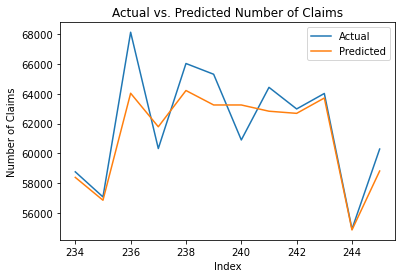

In [67]:
# Plot actual values
plt.plot(Test_Prediction_set['Initial Claims Filed'], label='Actual')

# Plot predicted values
plt.plot(Test_Prediction_Initial_Claim_Filed['Initial Claims Filed'], label='Predicted')

# Set plot title and axis labels
plt.title('Actual vs. Predicted Number of Claims')
plt.xlabel('Index')
plt.ylabel('Number of Claims')

# Set legend and display the plot
plt.legend()
plt.show()

# Train the model to predict Total benefits authorized

In [68]:
X = df[['Year', 'MonthNo', 'Initial Claims Filed', 'Average Weekly Benefit Amount (AWBA)']]
y = df['Total Benefits Authorized']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [69]:
models = {'Linear Regression': linear_reg} 
          
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name}: Mean Squared Error: {mse:.2f}, R-squared: {r2:.2f}')

Linear Regression: Mean Squared Error: 257844456727870.34, R-squared: 0.99


In [70]:
models = {'Decision Tree Regression': tree_reg}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name}: Mean Squared Error: {mse:.2f}, R-squared: {r2:.2f}')

Decision Tree Regression: Mean Squared Error: 435741605180179.38, R-squared: 0.99


In [71]:
models = {'Random Forest Regression': forest_reg}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name}: Mean Squared Error: {mse:.2f}, R-squared: {r2:.2f}')

Random Forest Regression: Mean Squared Error: 190237822978847.22, R-squared: 0.99


In [72]:
models = {'Gradient Boosting Regression': grad_boost_reg}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name}: Mean Squared Error: {mse:.2f}, R-squared: {r2:.2f}')

Gradient Boosting Regression: Mean Squared Error: 182619242595351.50, R-squared: 0.99


In [73]:
models = {'Support Vector Regression': svm_reg}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name}: Mean Squared Error: {mse:.2f}, R-squared: {r2:.2f}')

Support Vector Regression: Mean Squared Error: 35503317161634356.00, R-squared: -0.21


### Selecting Gradient Boosting Regression based on MSE & R2Square

In [74]:
grad_boost_reg.fit(X_train, y_train)
y_pred = grad_boost_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Gradient Boosting Regression: Mean Squared Error: {mse:.2f}, R-squared: {r2:.2f}')

Gradient Boosting Regression: Mean Squared Error: 182619242595351.50, R-squared: 0.99


In [75]:
y_2023_Prediction_Ben_Authorized = grad_boost_reg.predict(X_2023_Prediction)
print(y_2023_Prediction_Ben_Authorized)

[5.65822949e+08 5.56371998e+08 5.63707859e+08 5.83598447e+08
 5.83598447e+08 5.83598447e+08 5.83598447e+08 5.83598447e+08
 5.82088630e+08 5.74486515e+08]


C:\Users\ramya\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [76]:
np.int64(y_2023_Prediction_Ben_Authorized)

array([565822948, 556371997, 563707859, 583598447, 583598447, 583598447,
       583598447, 583598447, 582088630, 574486514], dtype=int64)

In [77]:
X_2023_Prediction['Total Benefits Authorized'] = np.int64(y_2023_Prediction_Ben_Authorized)
X_2023_Prediction

,Year,MonthNo,Average Weekly Benefit Amount (AWBA),Initial Claims Filed,Total Benefits Authorized
1,2023,1,750,75023,565822948
2,2023,2,750,70972,556371997
3,2023,3,750,66966,563707859
4,2023,4,750,68309,583598447
5,2023,5,750,68421,583598447
6,2023,6,750,68126,583598447
7,2023,7,750,67982,583598447
8,2023,8,750,68688,583598447
9,2023,9,750,65688,582088630
10,2023,10,750,68495,574486514


In [78]:
## Evaluate prediction against actual values

Test_Prediction_Total_Ben_Auth = Test_Prediction_set[['Year', 'MonthNo', 'Initial Claims Filed', 'Average Weekly Benefit Amount (AWBA)']]

result = grad_boost_reg.predict(Test_Prediction_Total_Ben_Auth)

Test_Prediction_Total_Ben_Auth['Total Benefits Authorized'] = np.int64(result)
Test_Prediction_Total_Ben_Auth

C:\Users\ramya\AppData\Local\Temp/ipykernel_4152/4103991557.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test_Prediction_Total_Ben_Auth['Total Benefits Authorized'] = np.int64(result)


,Year,MonthNo,Initial Claims Filed,Average Weekly Benefit Amount (AWBA),Total Benefits Authorized
234,2002,12.0,58771,302.85,252979523
235,2002,11.0,57093,302.65,230128997
236,2002,10.0,68115,302.86,262222609
237,2002,9.0,60331,302.76,240328691
238,2002,8.0,66022,303.59,258715487
239,2002,7.0,65303,303.69,258715487
240,2002,6.0,60906,303.52,243833490
241,2002,5.0,64426,302.84,258231579
242,2002,4.0,62981,302.48,246331236
243,2002,3.0,64017,301.31,241983192


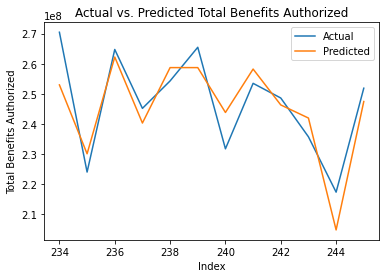

In [79]:
# Plot actual values
plt.plot(Test_Prediction_set['Total Benefits Authorized'], label='Actual')

# Plot predicted values
plt.plot(Test_Prediction_Total_Ben_Auth['Total Benefits Authorized'], label='Predicted')

# Set plot title and axis labels
plt.title('Actual vs. Predicted Total Benefits Authorized')
plt.xlabel('Index')
plt.ylabel('Total Benefits Authorized')

# Set legend and display the plot
plt.legend()
plt.show()

## Train Model to get DI Fund Balance based on Claims Filed and Total Benefits Authorized

In [80]:
X = df[['Year', 'MonthNo', 'Average Weekly Benefit Amount (AWBA)', 'Initial Claims Filed', 'Total Benefits Authorized']]
y = df['DI Fund Balance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [81]:
models = {'Linear Regression': linear_reg}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name}: Mean Squared Error: {mse:.2f}, R-squared: {r2:.2f}')

Linear Regression: Mean Squared Error: 254997481407907008.00, R-squared: 0.80


In [82]:
models = {'Decision Tree Regression': tree_reg}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name}: Mean Squared Error: {mse:.2f}, R-squared: {r2:.2f}')

Decision Tree Regression: Mean Squared Error: 26750860095717848.00, R-squared: 0.98


In [83]:
models = {'Random Forest Regression': forest_reg}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name}: Mean Squared Error: {mse:.2f}, R-squared: {r2:.2f}')

Random Forest Regression: Mean Squared Error: 20917421953690548.00, R-squared: 0.98


In [84]:
models = {'Gradient Boosting Regression': grad_boost_reg}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name}: Mean Squared Error: {mse:.2f}, R-squared: {r2:.2f}')

Gradient Boosting Regression: Mean Squared Error: 17152427030040158.00, R-squared: 0.99


In [85]:
models = {'Support Vector Regression': svm_reg}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name}: Mean Squared Error: {mse:.2f}, R-squared: {r2:.2f}')

Support Vector Regression: Mean Squared Error: 1559963457197910016.00, R-squared: -0.21


### Selecting Gradient Boosting Regression based on MSE & R2Square

In [86]:
grad_boost_reg.fit(X_train, y_train)
y_pred = grad_boost_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Gradient Boosting Regression: Mean Squared Error: {mse:.2f}, R-squared: {r2:.2f}')

Gradient Boosting Regression: Mean Squared Error: 17152427030040158.00, R-squared: 0.99


In [87]:
y_2023_Prediction_DI_Balance = grad_boost_reg.predict(X_2023_Prediction)
print(np.int64(y_2023_Prediction_DI_Balance))

[3085384878 3388928453 3388928453 3373747217 3457840763 3464734081
 3464734081 3464734081 3490332617 3321585092]


In [88]:
X_2023_Prediction['DI Fund Balance'] = np.int64(y_2023_Prediction_DI_Balance)
X_2023_Prediction

,Year,MonthNo,Average Weekly Benefit Amount (AWBA),Initial Claims Filed,Total Benefits Authorized,DI Fund Balance
1,2023,1,750,75023,565822948,3085384878
2,2023,2,750,70972,556371997,3388928453
3,2023,3,750,66966,563707859,3388928453
4,2023,4,750,68309,583598447,3373747217
5,2023,5,750,68421,583598447,3457840763
6,2023,6,750,68126,583598447,3464734081
7,2023,7,750,67982,583598447,3464734081
8,2023,8,750,68688,583598447,3464734081
9,2023,9,750,65688,582088630,3490332617
10,2023,10,750,68495,574486514,3321585092


In [89]:
## Evaluate prediction against actual values

Test_Prediction_DI_Fraud_Balance = Test_Prediction_set[['Year', 'MonthNo', 'Average Weekly Benefit Amount (AWBA)', 'Initial Claims Filed', 'Total Benefits Authorized']]

result = grad_boost_reg.predict(Test_Prediction_DI_Fraud_Balance)

Test_Prediction_DI_Fraud_Balance['DI Fund Balance'] = np.int64(result)
Test_Prediction_DI_Fraud_Balance

C:\Users\ramya\AppData\Local\Temp/ipykernel_4152/1709432320.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test_Prediction_DI_Fraud_Balance['DI Fund Balance'] = np.int64(result)


,Year,MonthNo,Average Weekly Benefit Amount (AWBA),Initial Claims Filed,Total Benefits Authorized,DI Fund Balance
234,2002,12.0,302.85,58771,270445522,570150620
235,2002,11.0,302.65,57093,224061502,580424957
236,2002,10.0,302.86,68115,264734477,619100325
237,2002,9.0,302.76,60331,245195642,638007704
238,2002,8.0,303.59,66022,254298656,677250665
239,2002,7.0,303.69,65303,265457628,693648628
240,2002,6.0,303.52,60906,231773598,666733337
241,2002,5.0,302.84,64426,253496839,649879674
242,2002,4.0,302.48,62981,248624823,620575898
243,2002,3.0,301.31,64017,235760343,602434924


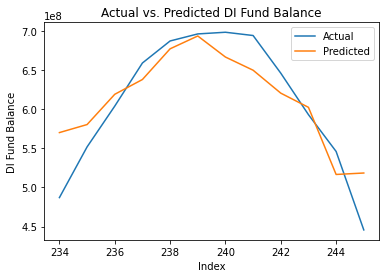

In [90]:
# Plot actual values
plt.plot(Test_Prediction_set['DI Fund Balance'], label='Actual')

# Plot predicted values
plt.plot(Test_Prediction_DI_Fraud_Balance['DI Fund Balance'], label='Predicted')

# Set plot title and axis labels
plt.title('Actual vs. Predicted DI Fund Balance')
plt.xlabel('Index')
plt.ylabel('DI Fund Balance')

# Set legend and display the plot
plt.legend()
plt.show()

# Thank you